乐学偶得版权所有 lexueoude.com 公众号：乐学Fintech

Logistic Regression 更多的是从概率的层面进行建模，但是我们实际应用中，更多的是用在二元分类型的问题

思考：如何算"更好的拟合"？ 类比一元线性回归的最小二乘法


Logistic_Regression

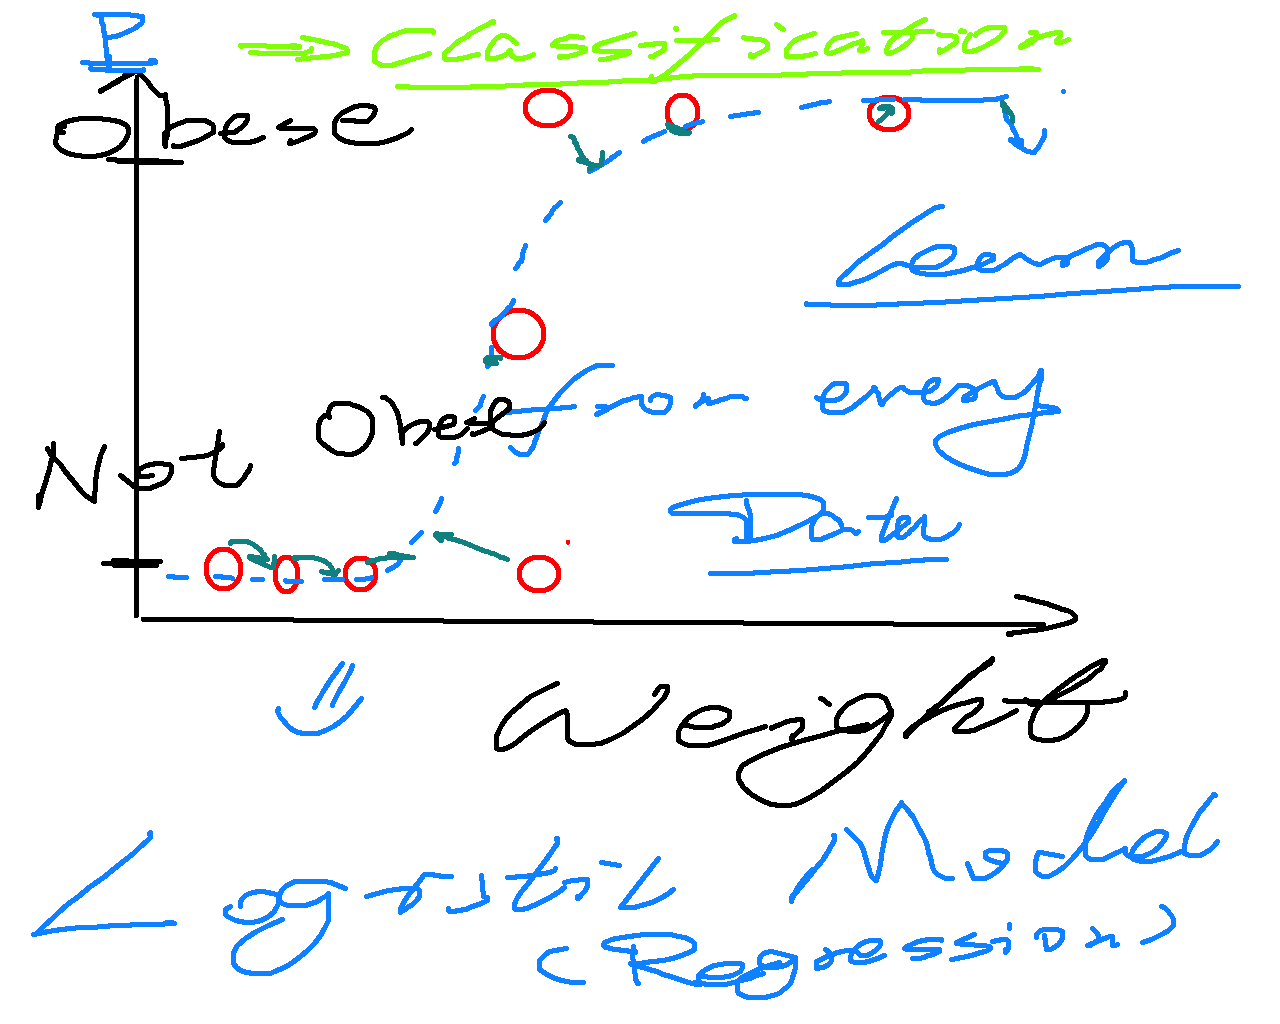

In [3]:
from IPython.display import Image
Image(filename='1.Logistic_Regression_Intro.png')

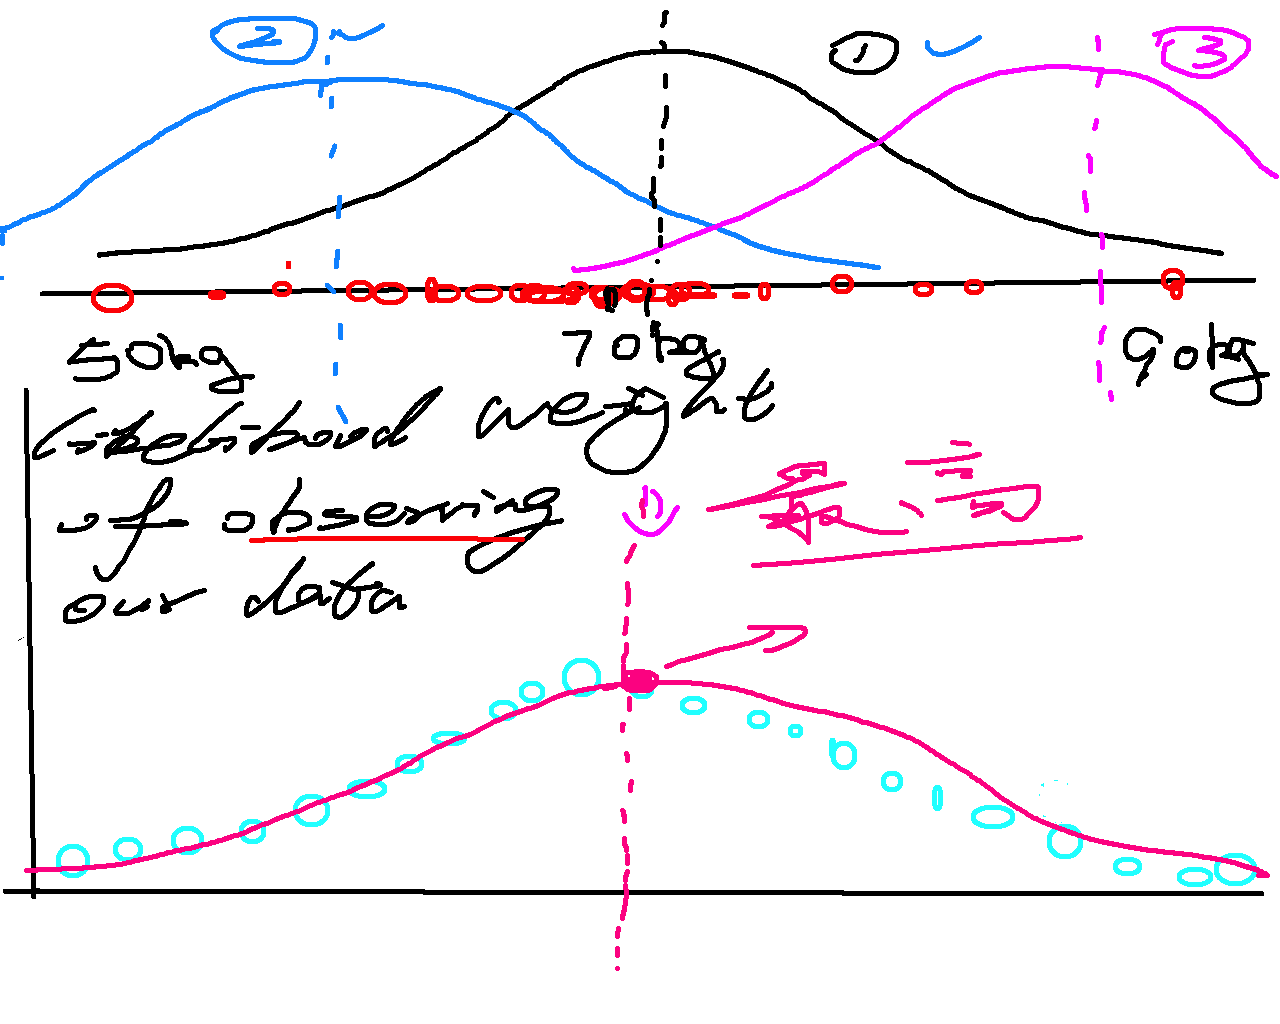

In [4]:
from IPython.display import Image
Image(filename='1.Maximum_Likelihood.png')

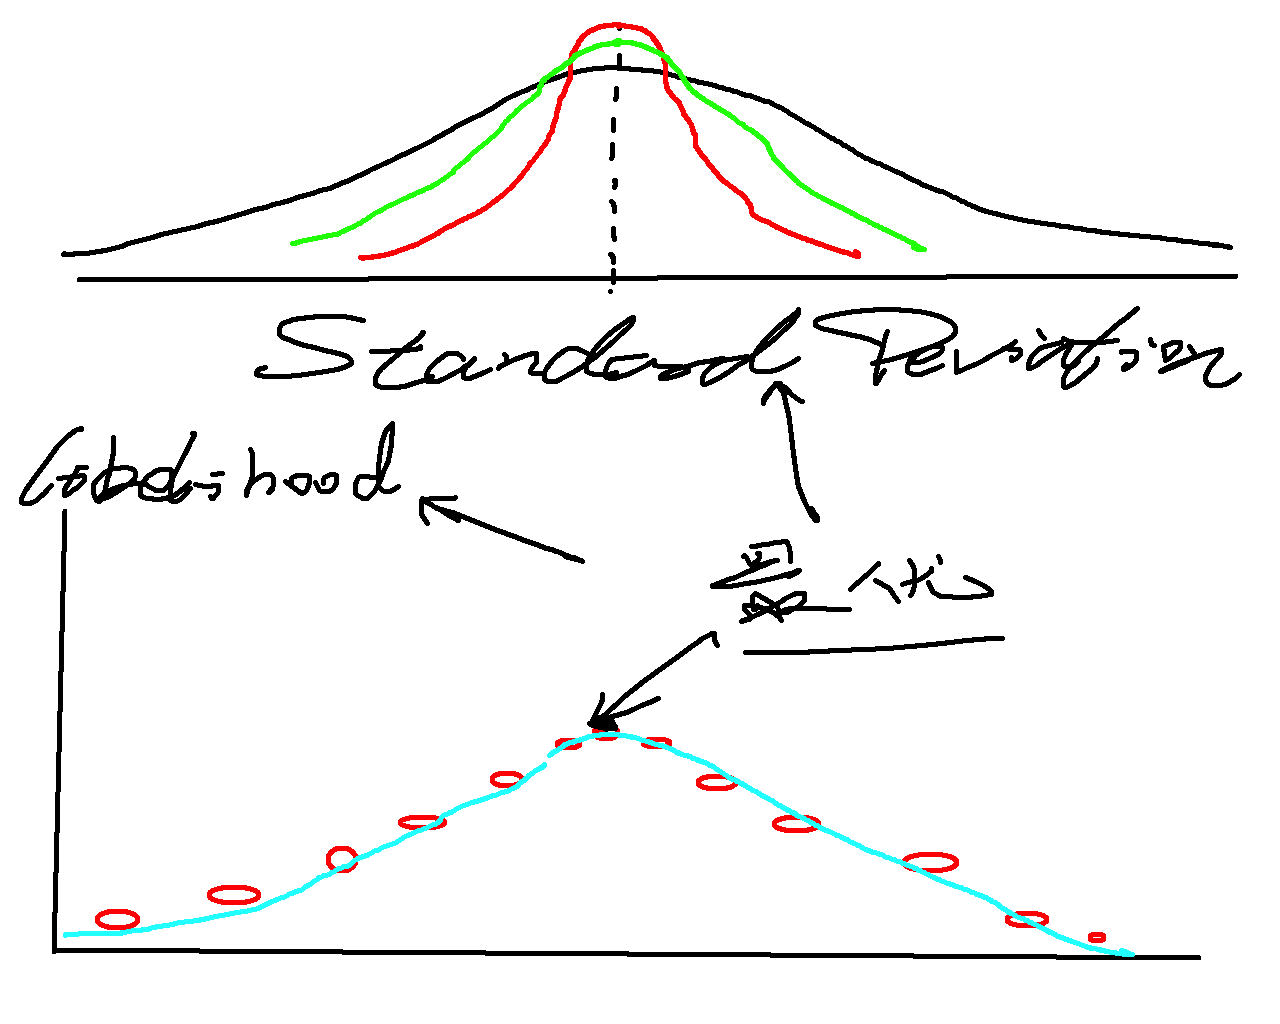

In [5]:
from IPython.display import Image
Image(filename='1.Maximum_Likelihood_2.png')



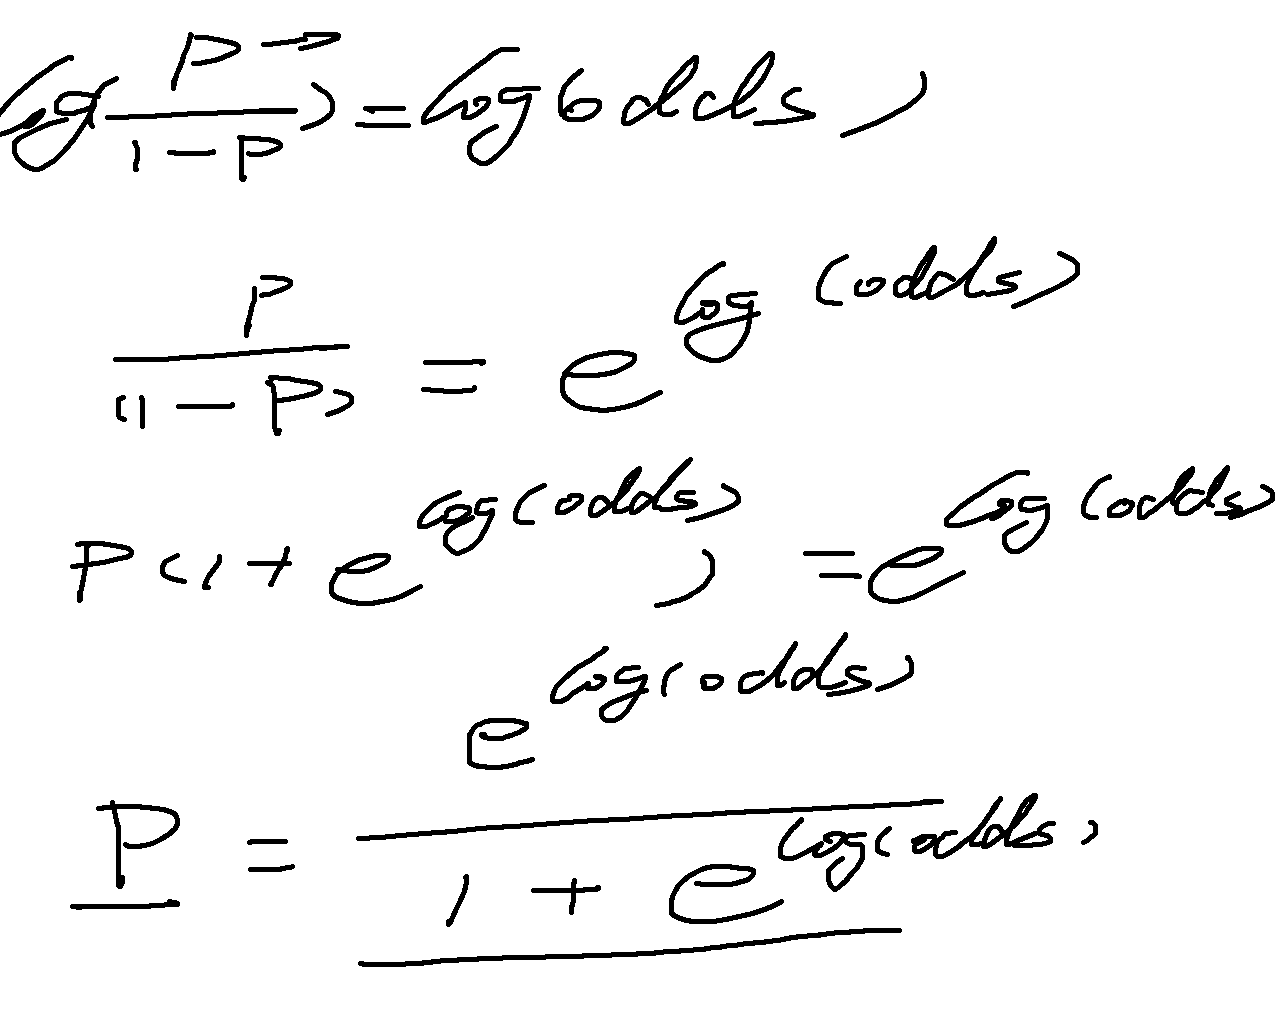

In [1]:
from IPython.display import Image
Image(filename='1.Log_of_Odds_by_Pro.png')



Logistic Regression
$$ yhat = \frac{e^{b0+b1*x1}}{1+e^{b0+b1*x1}} $$

$$ yhat = \frac{{1}}{1+e^{-(b0+b1*x1)}} $$

$$ b = b +learning \;rate * (y - yhat)*yhat *(1-yhat)*x)$$


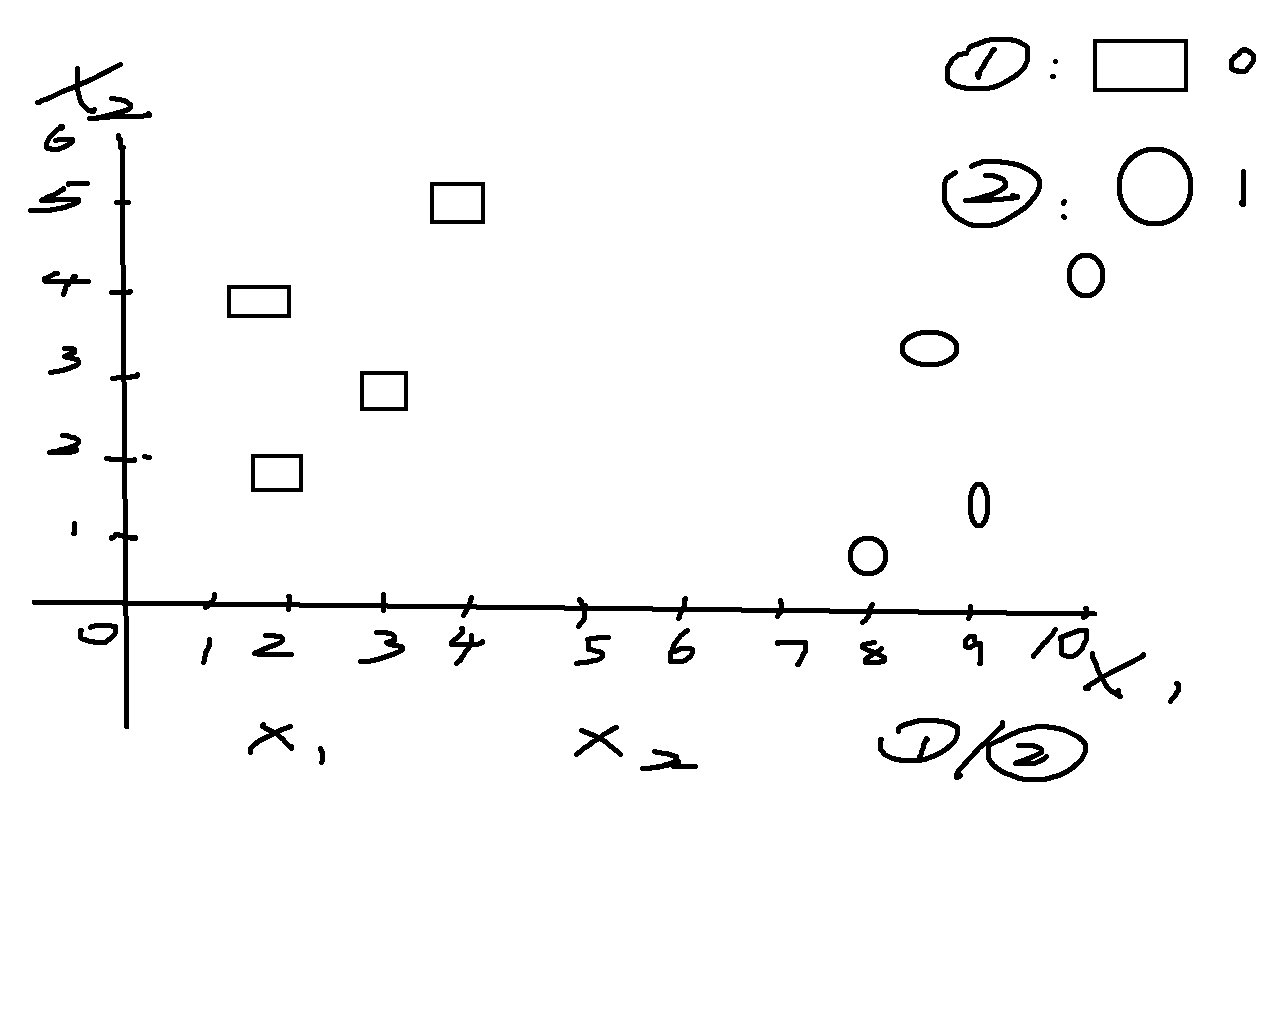

In [2]:
# prediction function
from math import exp
def prediction(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat+=coefficients[i+1]*row[i]
    return 1/(1+exp(-yhat))

In [ ]:
from IPython.display import Image
Image(filename='1.Test_Data.png')


X1 ,X2 ,0/1
2  ,2  , 0
2  ,4  , 0
3  ,3  , 0
4  ,5  , 0

8  ,1  , 1
8.5,3.5, 1
9  ,1  , 1
10 ,4  , 1



$$ y = \frac{1}{1+e^{-(b0+b1*X_1+b2*X_2)}}$$

In [5]:
dataset = [[2,2,0],
           [2,4,0],
           [3,3,0],
           [4,5,0],
           [8,1,1],
           [8.5,3.5,1],
           [9,1,1],
           [10,4,1]]
#随便plug-in 的数据
coef = [-0.5,0.9,-1.5]

# prediction function
from math import exp
def prediction(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat+=coefficients[i+1]*row[i]
    return 1/(1+exp(-yhat))

for row in dataset:
    yhat = prediction(row,coef)
    print("Our Expected Value( Real Value) is %.3f, The Predicted Value is %.3f [%d]" % (row[-1], yhat, round(yhat)))


Our Expected Value is 0.000, The Predicted Value is 0.154 [0]
Our Expected Value is 0.000, The Predicted Value is 0.009 [0]
Our Expected Value is 0.000, The Predicted Value is 0.091 [0]
Our Expected Value is 0.000, The Predicted Value is 0.012 [0]
Our Expected Value is 1.000, The Predicted Value is 0.995 [1]
Our Expected Value is 1.000, The Predicted Value is 0.870 [1]
Our Expected Value is 1.000, The Predicted Value is 0.998 [1]
Our Expected Value is 1.000, The Predicted Value is 0.924 [1]


$$b_0(t+1) = b_0(t)+ learning \: rate * (y(t)-yhat(t))*yhat(t) *(1-yhat(t))$$<br>
$$b_1(t+1) = b_1(t)+ learning \: rate * (y(t)-yhat(t))*yhat(t) *(1-yhat(t))*x1(t)$$<br>
$$error = prediction - expected $$


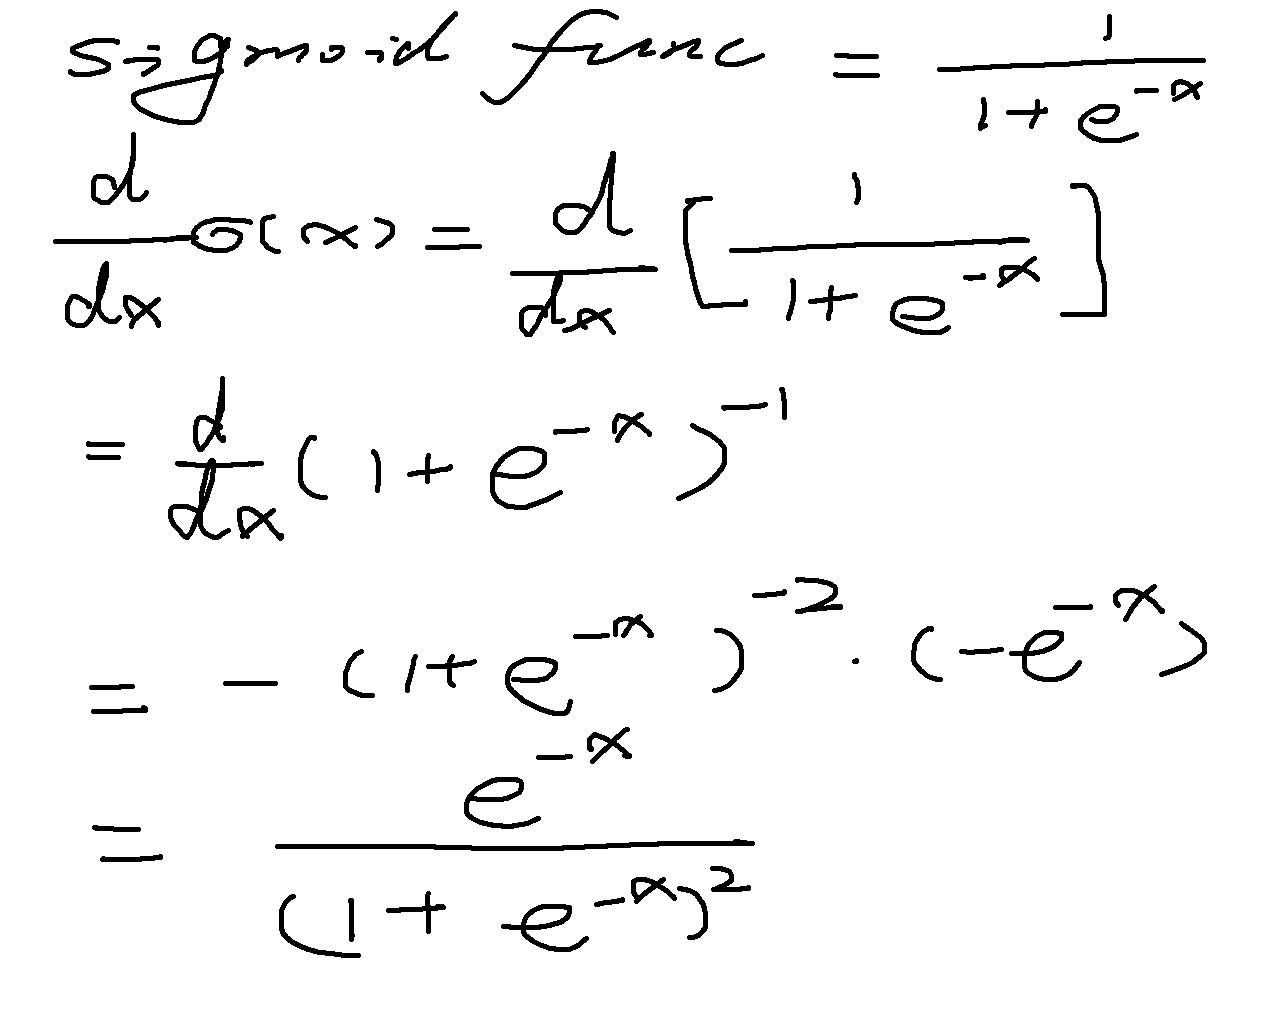

In [2]:
from IPython.display import Image
Image(filename='2.Sigmoid_Func_Derivative_1.png')


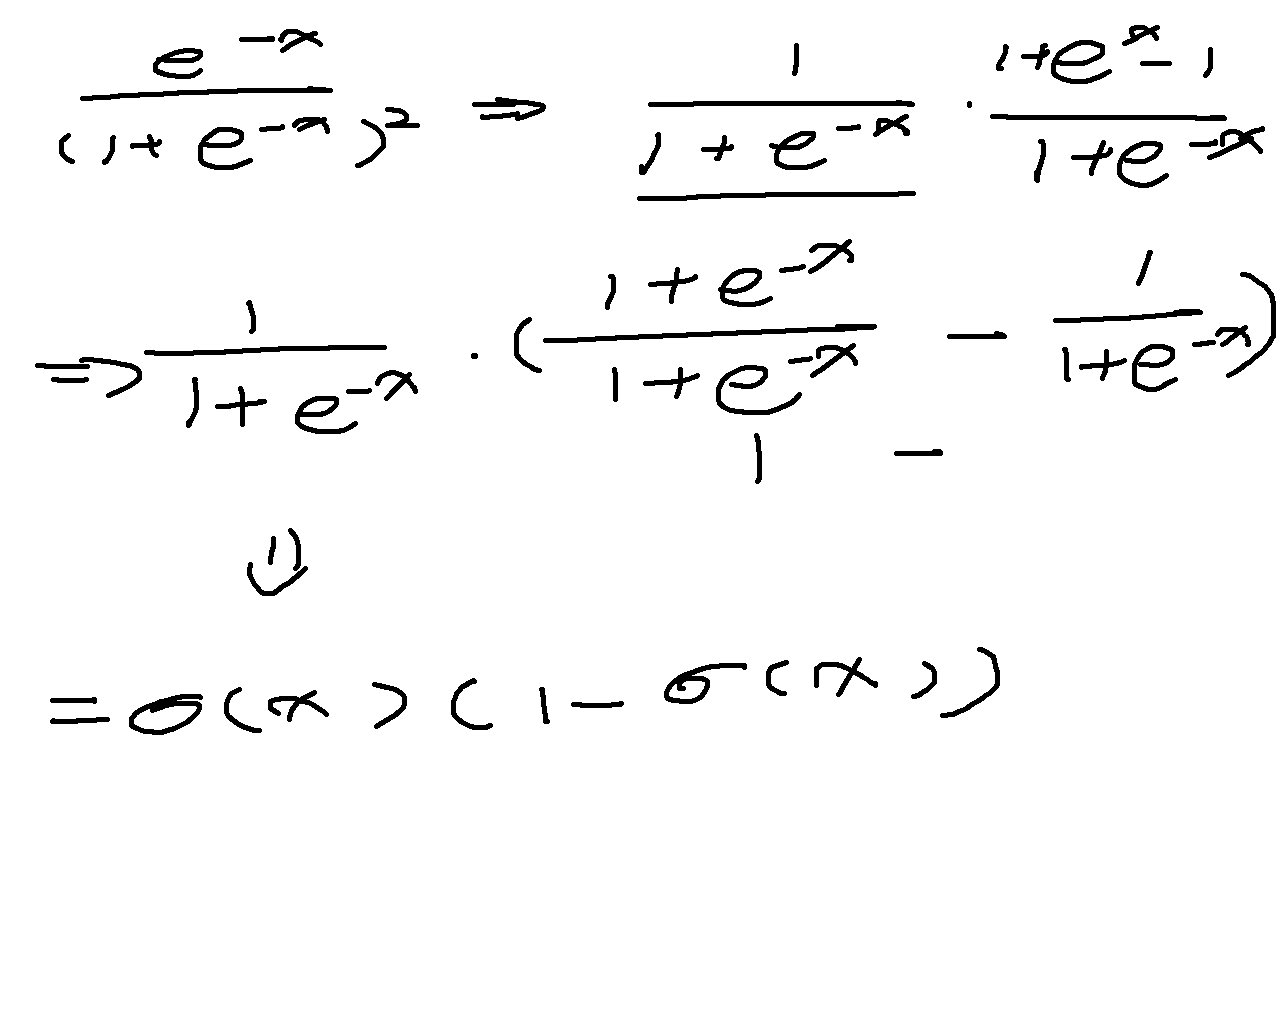

In [1]:
from IPython.display import Image
Image(filename='2.Sigmoid_Func_Derivative_2.png')

In [ ]:
#using stochastic gradient descent method to calculate logistic regression coefficients

def using_sgd_method_to_calculate_coefficients(training_dataset, learning_rate, n_times_epoch):
    coefficients = [0.0 for i in range(len(training_dataset[0]))]
    for epoch in range(n_times_epoch):
        the_sum_of_error = 0
        for row in training_dataset:
            y_hat = prediction(row, coefficients)
            error = row[-1] - y_hat
            the_sum_of_error += error ** 2
            coefficients[0] = coefficients[0] + learning_rate * error * y_hat * (1.0-y_hat)
            for i in range(len(row) - 1):
                coefficients[i + 1] = coefficients[i + 1] + learning_rate * error * y_hat * (1.0-y_hat)*row[i]
        print("This is epoch 【%d】,the learning rate we are using is 【%.3f】,the error is 【%.3f】" % (
            epoch, learning_rate, the_sum_of_error))
    return coefficients

